# **Ajustement linéaires**

## **importer des bibliothèques**

In [2]:
%pip install -r requirements.txt 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import numpy as np

## **Méthode des moindres carrés**
L'équation de la droite d'ajustement est de la forme : y = ax + b, où :
- "a" est le coefficient directeur de la droite.
- "b" est l'ordonnée à l'origine de la droite.

Le coefficient directeur "a" de la droite est calculé à l'aide de la formule suivante :
a = Σ(xi - x)(yi - y) / Σ(xi - x)^2

La constante "b" (ordonnée à l'origine) est calculée à l'aide de l'équation : y = ax + b.


La covariance entre x et y est : 23538.714285714283
La variance entre x 26951.5


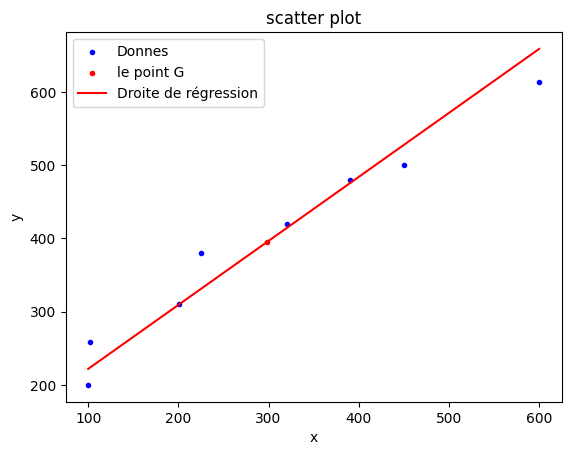

In [4]:
x = np.array([100,102,201,225,320,390,450,600])
y = np.array([200,259,310,380,420,480,500,613])
data = np.array([x, y])
cov_matrix = np.cov(data)
cov_xy = cov_matrix[0, 1]
var_x = x.var()
print("La covariance entre x et y est :", cov_xy)
print("La variance entre x", var_x)
a = cov_xy / var_x
x_bar = x.mean()
y_bar = y.mean()
G_point = [x_bar,y_bar]
b = y_bar - a*x_bar
plt.xlabel("x")
plt.ylabel("y")
plt.title("scatter plot")
plt.scatter(x,y,color='blue',marker='.',label="Donnes")
plt.scatter(G_point[0],G_point[1],color='red',marker='.',label="le point G")
plt.plot(x, a * x + b, color='red', label='Droite de régression')
plt.legend()


## **Méthode de Mayer**

La méthode de Mayer est une technique d'ajustement linéaire qui consiste à découper la série de données en deux sous-séries. Cette approche permet de prendre en compte tous les points de la série lors de l'ajustement de la droite de régression.

1. **Découpage de la série de données** :
   - La série de données est divisée en deux sous-séries, généralement de manière égale. Cela garantit que tous les points de la série sont pris en compte dans l'ajustement.

2. **Calcul des points moyens** :
   - Le point moyen est calculé pour chaque sous-série. C'est la moyenne des valeurs de la sous-série.

3. **Détermination de l'équation de la droite d'ajustement** :
   - L'équation de la droite d'ajustement est trouvée en passant par les deux points moyens des sous-séries. Cela permet d'obtenir une droite qui représente au mieux la tendance générale des données.

4. **Traitement des séries impaires** :
   - Si la série de données comporte un nombre impair de points, il est recommandé de prendre un point supplémentaire dans la deuxième sous-série. Cela permet d'augmenter son poids relatif, car elle est plus récente et donc plus représentative.

Cette méthode offre une approche intéressante pour ajuster une droite de régression tout en prenant en compte l'ensemble des données disponibles.


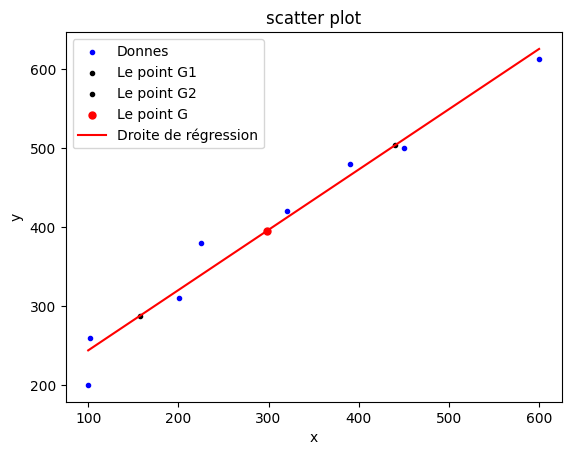

In [5]:
x = np.array([100,102,201,225,320,390,450,600])
y = np.array([200,259,310,380,420,480,500,613])

x1,x2 = x[:4],x[4:]
y1,y2 = y[:4],y[4:]

x1_bar = x1.mean()
y1_bar = y1.mean()
PG1 = [x1_bar,y1_bar]
x2_bar = x2.mean()
y2_bar = y2.mean()
PG2 = [x2_bar,y2_bar]

plt.title("scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x,y,c='b',marker='.',label="Donnes")
plt.scatter(PG1[0],PG1[1],c='black',marker='.',label="Le point G1")
plt.scatter(PG2[0],PG2[1],c='black',marker='.',label="Le point G2")
plt.scatter(G_point[0],G_point[1],c='red',marker='.',label="Le point G",s=100)

a = (y2_bar - y1_bar) / (x2_bar-x1_bar)
b = y_bar - a*x_bar
plt.plot(x, a * x + b, color='red', label='Droite de régression')
plt.legend()

# **Méthode des points extrêmes**

La méthode des points extrêmes est une technique d'ajustement linéaire qui consiste à calculer l'équation de la droite d'ajustement qui passe par le premier point et le dernier point d'une série de coordonnées (x, y). Cette méthode est souvent utilisée lorsque l'on constate que la variable, par exemple le nombre de commandes, augmente ou diminue de façon très régulière en fonction de l'autre variable, par exemple, le temps.

### Utilisation préférentielle
Cette méthode est préférée dans les cas où les données semblent suivre une tendance linéaire constante sur toute la plage de valeurs. Elle est particulièrement adaptée lorsque la relation entre les variables est linéaire et que les points de données sont répartis de manière homogène le long de la droite de régression.

### Avantages
- Simple à utiliser : La méthode des points extrêmes est la méthode la plus simple pour ajuster une droite de régression.
- Appropriée pour les tendances linéaires : Elle est bien adaptée lorsque la relation entre les variables est linéaire et que les points de données suivent une tendance constante.

### Inconvénients
- Sensibilité aux points extrêmes : Comme elle ne prend en compte que deux points, cette méthode peut être sensible aux valeurs extrêmes ou aux erreurs de mesure dans les données.

Cette méthode offre une approche simple et rapide pour ajuster une droite de régression lorsque les données semblent suivre une tendance linéaire constante sur toute la plage de valeurs.


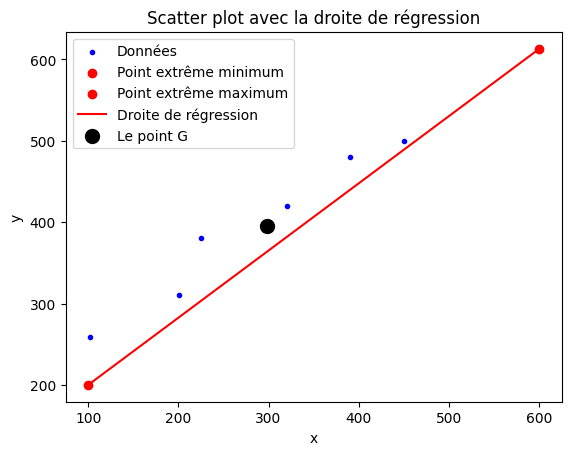

In [11]:
x = np.array([100, 102, 201, 225, 320, 390, 450, 600])
y = np.array([200, 259, 310, 380, 420, 480, 500, 613])

x_min, y_min = x[0], y[0]
x_max, y_max = x[-1], y[-1]
m = (y_max - y_min) / (x_max - x_min)
b = y_min - m * x_min
plt.scatter(x, y, c='b', marker='.', label="Données")
plt.scatter(x_min, y_min, c='r', marker='o', label="Point extrême minimum")
plt.scatter(x_max, y_max, c='r', marker='o', label="Point extrême maximum")
plt.plot(x, m * x + b, color='red', label='Droite de régression')
plt.scatter(G_point[0], G_point[1], c='black', marker='o', label="Le point G", s=100)
plt.title("Scatter plot avec la droite de régression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


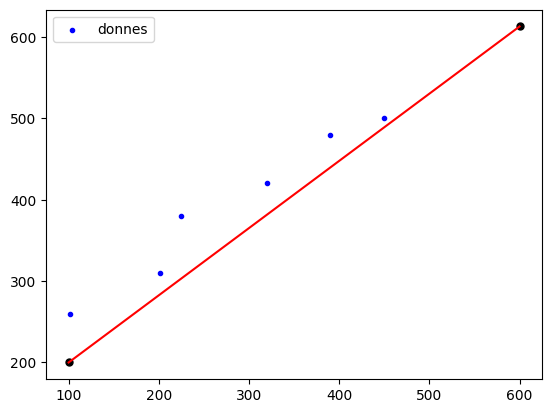

In [20]:
x = np.array([100, 102, 201, 225, 320, 390, 450, 600])
y = np.array([200, 259, 310, 380, 420, 480, 500, 613])

xmin , ymin = x[0],y[0]
xmax , ymax = x[-1],y[-1]

a = (ymax - ymin) / (xmax - xmin)

b = ymin - a*xmin

plt.scatter(x,y,c="blue",marker='.',label="donnes")
plt.plot(x,a*x+b,c='red')
plt.scatter(xmax,ymax,c='black',marker='.',s=100)
plt.scatter(xmin,ymin,c='black',marker='.',s=100)
plt.legend()